# <center>Network Science</center>

## <center>Home Assignment #2: Network models</center>

### <center>Student: *Oleg Khomyuk*</center>

#### <hr /> General Information

**Due Date:** 28.02.2016 23:59 <br \>
**Late submission policy:** -0.2 points per day <br \>


Please send your reports to <network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1

Consider Barabasi and Albert dynamical grow model. Two main ingredients of this model are *network growing* and *prefferential attachment*. Implement two restricted B&A-based models:
<br \>

**Model A**
<br \>
Lack of prefferential attachment, that is at each time-step form edges uniformly at random while network keeps growing.

**Model B**
<br \>
Lack of growing, that is fix total number of nodes, on each time-step randomly choose one and form edges with prefferential attachment.
<br \>

1. Generate networks according to the models above ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
4. Is scale-free property conserved in these models?

Analyse results with respect to various parameter settings

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline

## Model A

In [2]:
def generate_graph_A(N, p):
    #N = Number of nodes
    #p = Probability of new edge emerging
    # Generating graph with uniformly distributed edges
    G = nx.Graph()
    G.add_node(0)
    avg_path_len = [0]
    avg_clust = [np.mean(nx.clustering(G).values())]
    avg_deg = [nx.degree(G, 0)]
    for step in xrange(1, N):
        G.add_node(step)
        for n in G.nodes():
            X = G.nodes()[:-1]
            for m in X:
                if np.random.uniform() < p:
                    G.add_edge(step, m)
        # Calculate average path length for step
        if nx.is_connected(G):
            avg_path_len.append(nx.average_shortest_path_length(G))
        else:
            avg_path_len.append(0)
        # Calculate average clustering coefficient for step    
        avg_clust.append(np.mean(nx.clustering(G).values()))
        # Calculate average degree for step
        degs = []
        for n in G.nodes():
            degs.append(nx.degree(G, n))
        avg_deg.append(np.mean(degs))
        degrees = sorted(nx.degree(G).values())
    return avg_path_len, avg_clust, avg_deg, degrees

In [3]:
ps = [.01, .05, .1, .3, .5, .7]
lens = []
clusts = []
degs = []
all_degrees = []
for i in range(len(ps)):
    avg_path_len, avg_clust, avg_deg, degrees = generate_graph_A(200, ps[i])
    lens.append(avg_path_len)
    clusts.append(avg_clust)
    degs.append(avg_deg)
    all_degrees.append(degrees)

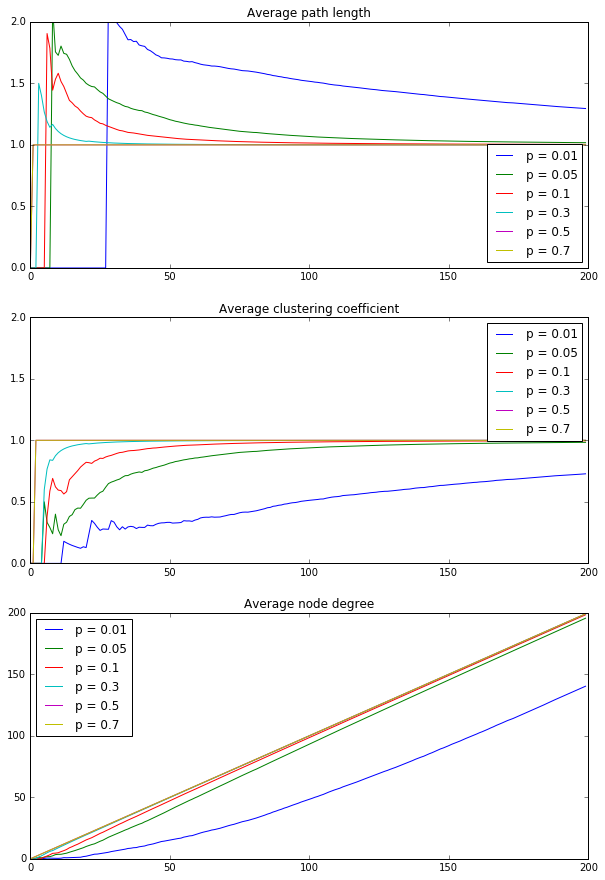

In [19]:
N = 200
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.title('Average path length')
plt.ylim(0, max(avg_path_len) + 1)
for i in range(len(ps)):
    plt.plot(range(N), lens[i], label='p = '+str(ps[i]))
plt.legend(loc=4)

plt.subplot(3, 1, 2)
plt.title('Average clustering coefficient')
plt.ylim(0, max(avg_clust) + 1)
for i in range(len(ps)):
    plt.plot(range(N), clusts[i], label='p = '+str(ps[i]))
plt.legend(loc=1)

plt.subplot(3, 1, 3)
plt.title('Average node degree')
plt.ylim(0, max(avg_deg) + 1)
for i in range(len(ps)):
    plt.plot(range(N), degs[i], label='p = '+str(ps[i]))
plt.legend(loc=0);

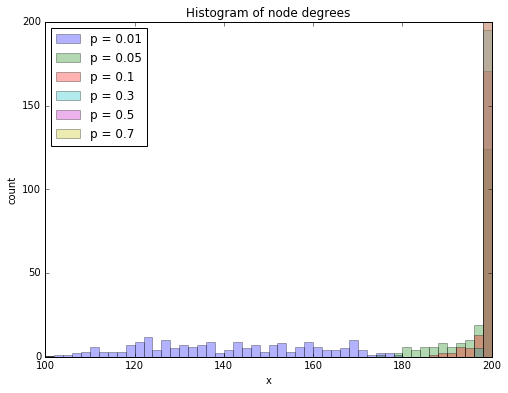

In [18]:
bins = range(100, 201, 2)
plt.figure(figsize=(8, 6))
h = plt.hist(all_degrees[0], label='p = '+str(ps[0]), alpha=.3, bins=bins)
for i in range(1, len(ps)):
    plt.hist(all_degrees[i], label='p = '+str(ps[i]), bins=bins, alpha=.3)
plt.ylabel('count')
plt.xlabel('x')
plt.title('Histogram of node degrees')
plt.legend(loc=2);

So it's obvious that with this model the graph ends up being almost complete with most node degrees being equal to $N - 1$ where $N$ is number of nodes. As such, the average lenght of shortest path between two nodes converges to 1 and average clustering coefficient also converges to 1.

## Model B

In [36]:
def generate_graph_B(M, N):
    # M = number of steps
    # N = number of nodes
    # Generating graph with lack of growing
    B = nx.Graph()
    for n in xrange(N):
        B.add_node(n)

    avg_path_len_b = []
    avg_clust_b = []
    avg_deg_b = [] 

    B.add_edge(0, 1)

    for step in xrange(M):
        for n in B.nodes():
            for m in B.nodes():
                if m != n:
                    coef = float(nx.degree(B, m))/float(2*len(B.edges()))
                    if np.random.uniform() < coef and not B.has_edge(n, m):
                        B.add_edge(n, m)
        # Calculate average path length for step
        if nx.is_connected(B):
            avg_path_len_b.append(nx.average_shortest_path_length(B))
        else:
            avg_path_len_b.append(0)
        # Calculate average clustering coefficient for step    
        avg_clust_b.append(np.mean(nx.clustering(B).values()))
        # Calculate average degree for step
        degs = []
        for n in B.nodes():
            degs.append(nx.degree(B, n))
        avg_deg_b.append(np.mean(degs))
        degrees = sorted(nx.degree(B).values())
    return avg_path_len_b, avg_clust_b, avg_deg_b, degrees

In [37]:
Ns = [10, 30, 50, 70, 100]
lens = []
clusts = []
degs = []
all_degrees = []
for i in range(len(Ns)):
    avg_path_len, avg_clust, avg_deg, degrees = generate_graph_B(100, Ns[i])
    lens.append(avg_path_len)
    clusts.append(avg_clust)
    degs.append(avg_deg)
    all_degrees.append(degrees)

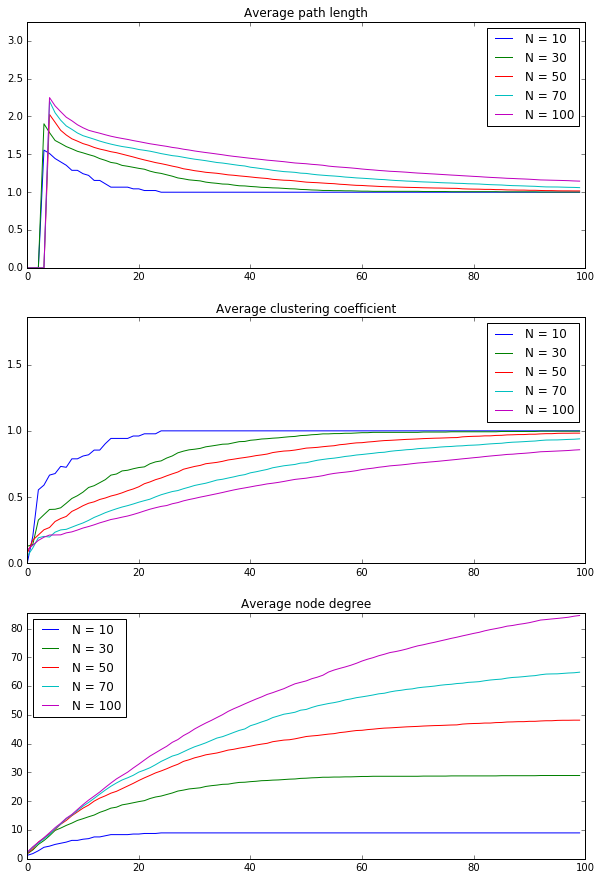

In [38]:
plt.figure(figsize=(10, 15))
plt.subplot(3, 1, 1)
plt.title('Average path length')
plt.ylim(0, max(avg_path_len) + 1)
for i in range(len(Ns)):
    plt.plot(range(100), lens[i], label='N = '+str(Ns[i]))
plt.legend(loc=0)

plt.subplot(3, 1, 2)
plt.title('Average clustering coefficient')
plt.ylim(0, max(avg_clust) + 1)
for i in range(len(Ns)):
    plt.plot(range(100), clusts[i], label='N = '+str(Ns[i]))
plt.legend(loc=0)

plt.subplot(3, 1, 3)
plt.title('Average node degree')
plt.ylim(0, max(avg_deg) + 1)
for i in range(len(Ns)):
    plt.plot(range(100), degs[i], label='N = '+str(Ns[i]))
plt.legend(loc=0);

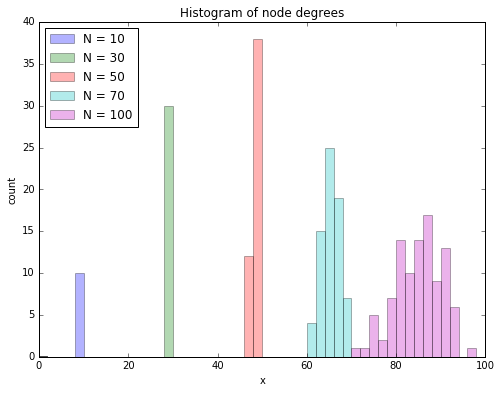

In [43]:
bins = range(0, 101, 2)
plt.figure(figsize=(8, 6))
h = plt.hist(all_degrees[0], label='N = '+str(Ns[0]), alpha=.3, bins=bins)
for i in range(1, len(Ns)):
    plt.hist(all_degrees[i], label='N = '+str(Ns[i]), bins=bins, alpha=.3)
plt.ylabel('count')
plt.xlabel('x')
plt.title('Histogram of node degrees')
plt.legend(loc=2);

With this model the nodes tend to connect to most popular node so as we start with only one edge between 0 and 1, they become most popular and their degree only grows with each step of the algorithm. The resulting distribution of node degrees on the histogram above shows that starting from some step, the number of nodes with lower degrees deteriorates, but most nodes still end up with degrees much less than N−1 where N is number of nodes in the graph.

### <hr /> Task 2

Consider the following  "Vertex copying model" of growing network.

At every time step a random vertex from already existing vertices is selected and duplicated together with all edges, such that  every edge of the  vertex
* is copied with probability $q$
* is rewired to any other randomly selected vertex with probability $1-q$


Starting state is defined by some small number of randomly connected vertices.

The model can generate both directed and undirected networks.

1. Generate  graphs based on the model ($N > 1000$ nodes)
2. Compute CDF/PDF, describe the distribution and compute\describe its properties.
3. Illustate the following dependencies: 
    * average path length to the number of nodes
    * average clustering coefficient to the number of nodes
    * average node degee to the nodes "age"
    
Analyse results with respect to various parameter settings